In [1]:
from Bio import SeqIO
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats    
import math
from sklearn.decomposition import PCA
from scipy.interpolate import Rbf
import scipy.cluster.hierarchy as shc
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [13]:
seq = ""
sequences = []
for record in SeqIO.parse("RF02913.afa.txt", "fasta"):
    sequences.append(record.seq)


In [45]:
rna_dict = {"A":[1./2., 0, 0, 0, 0, 0], "U":[0, 1./2., 0, 0, 0, 0], "C":[0, 0, 1./2., 0, 0, 0], "G":[0, 0, 0, 1./2., 0, 0], "-":[0, 0, 0, 0, 1./2., 0], "N":[0, 0, 0, 0, 0, 1./2.]}

In [46]:
seq_vec = pd.DataFrame([list(np.concatenate([rna_dict[alpha] for alpha in seq])) for seq in sequences])


In [57]:
pca = PCA(n_components=3)
vecs_seqs=pca.fit_transform(seq_vec) 
vecs_pos = pca.fit_transform(seq_vec.T)

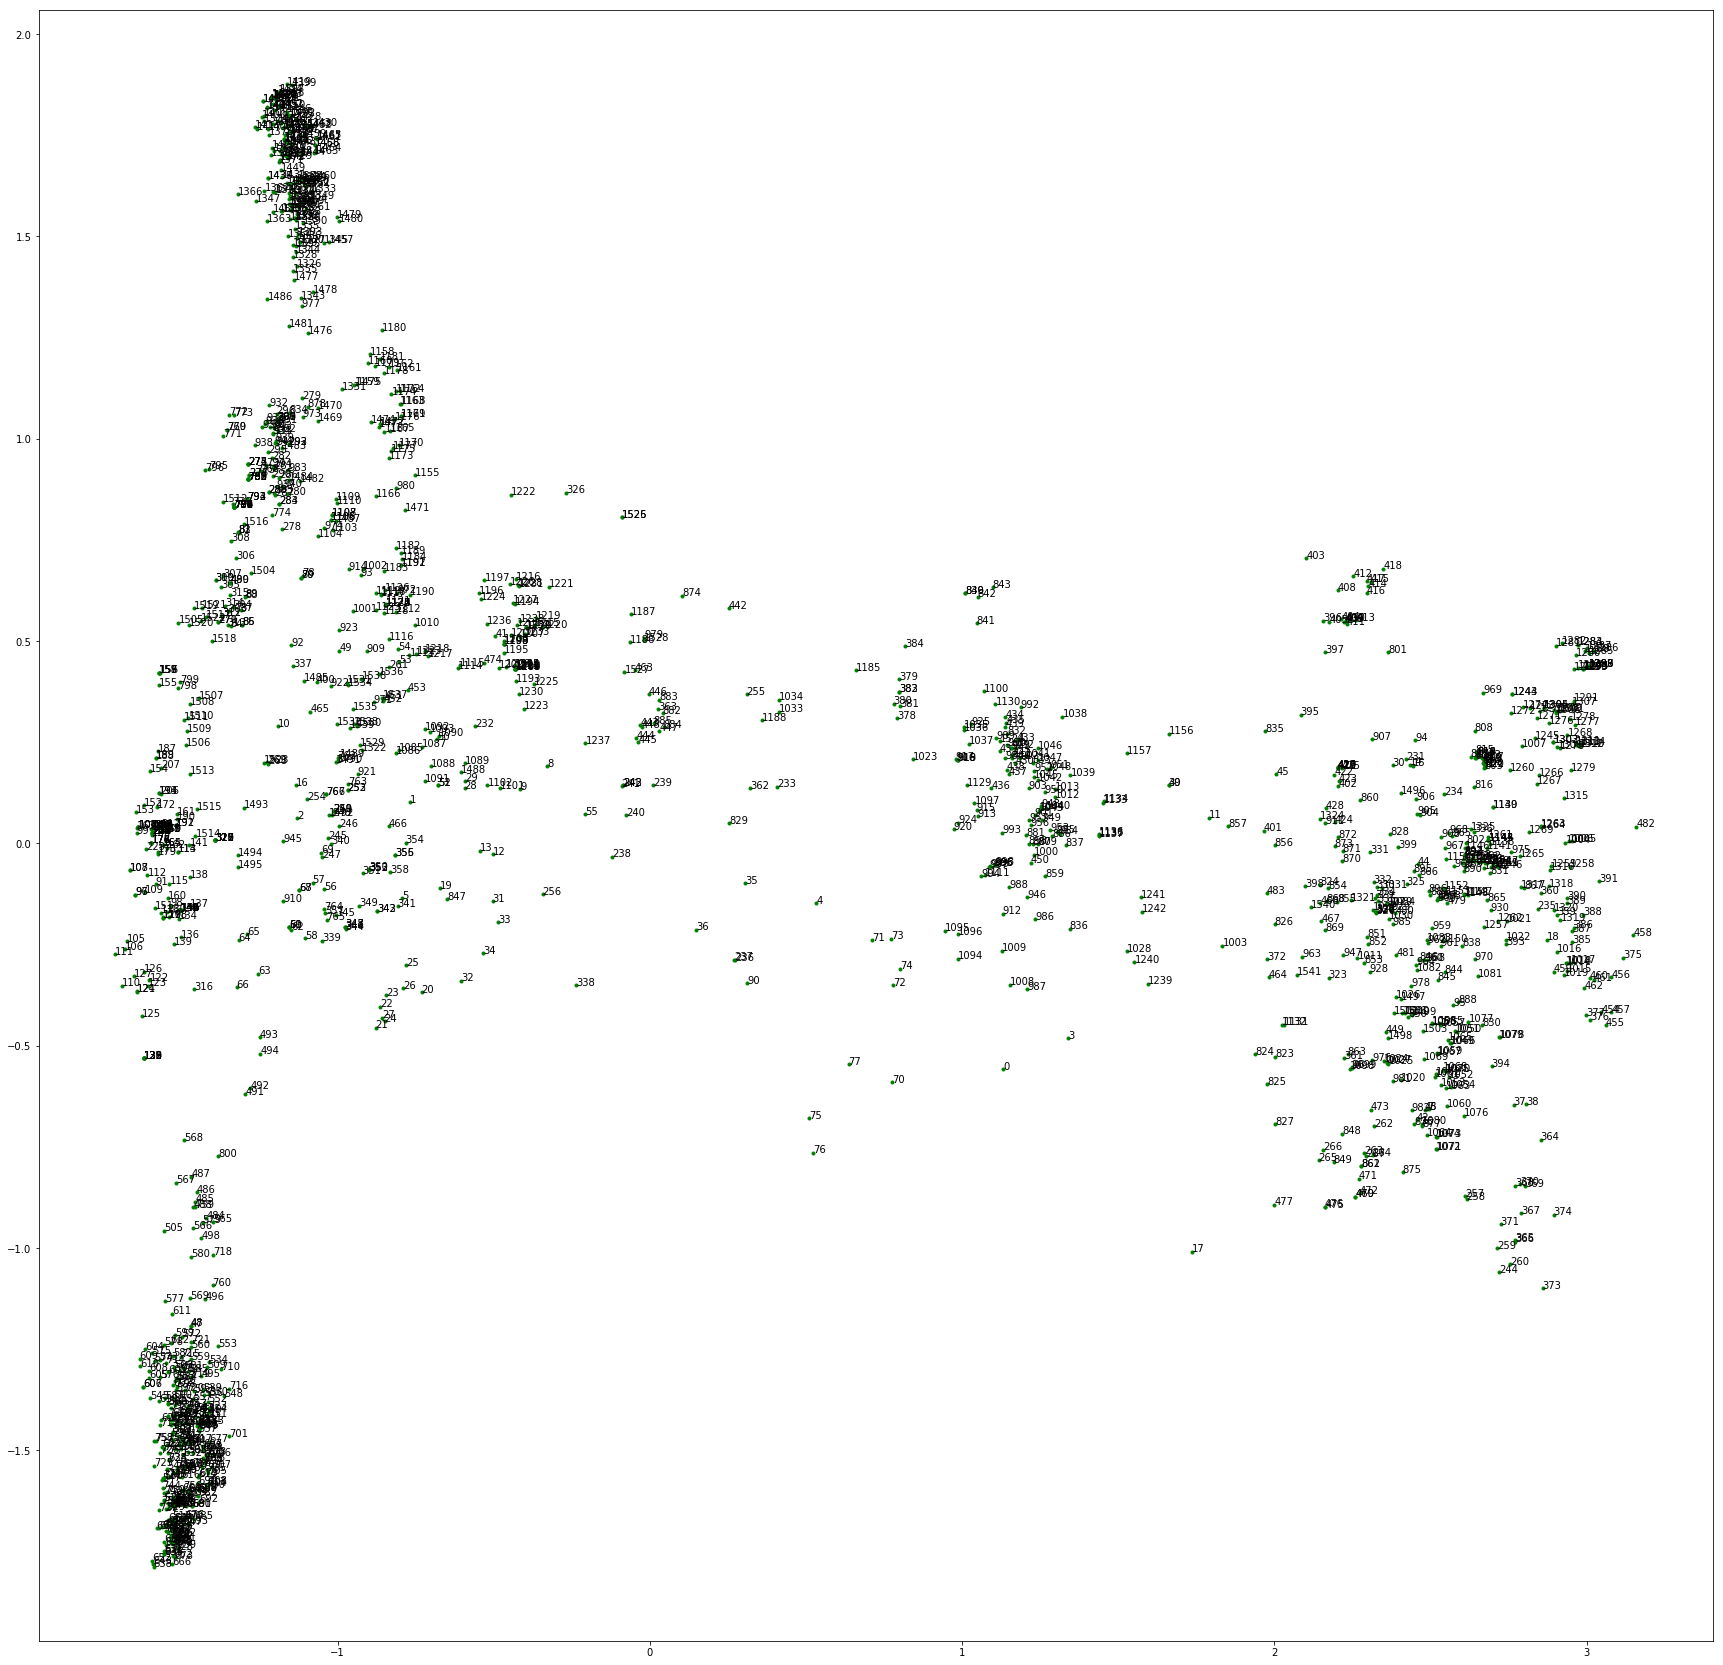

In [58]:
plt.figure(figsize = (30, 30))
ax = plt.subplot()
plt.plot(vecs_seqs[:,0], vecs_seqs[:,1], "g.")

for i in range(len(vecs_seqs[:,0])):
    ax.annotate(str(i), (vecs_seqs[i,0], vecs_seqs[i,1]))

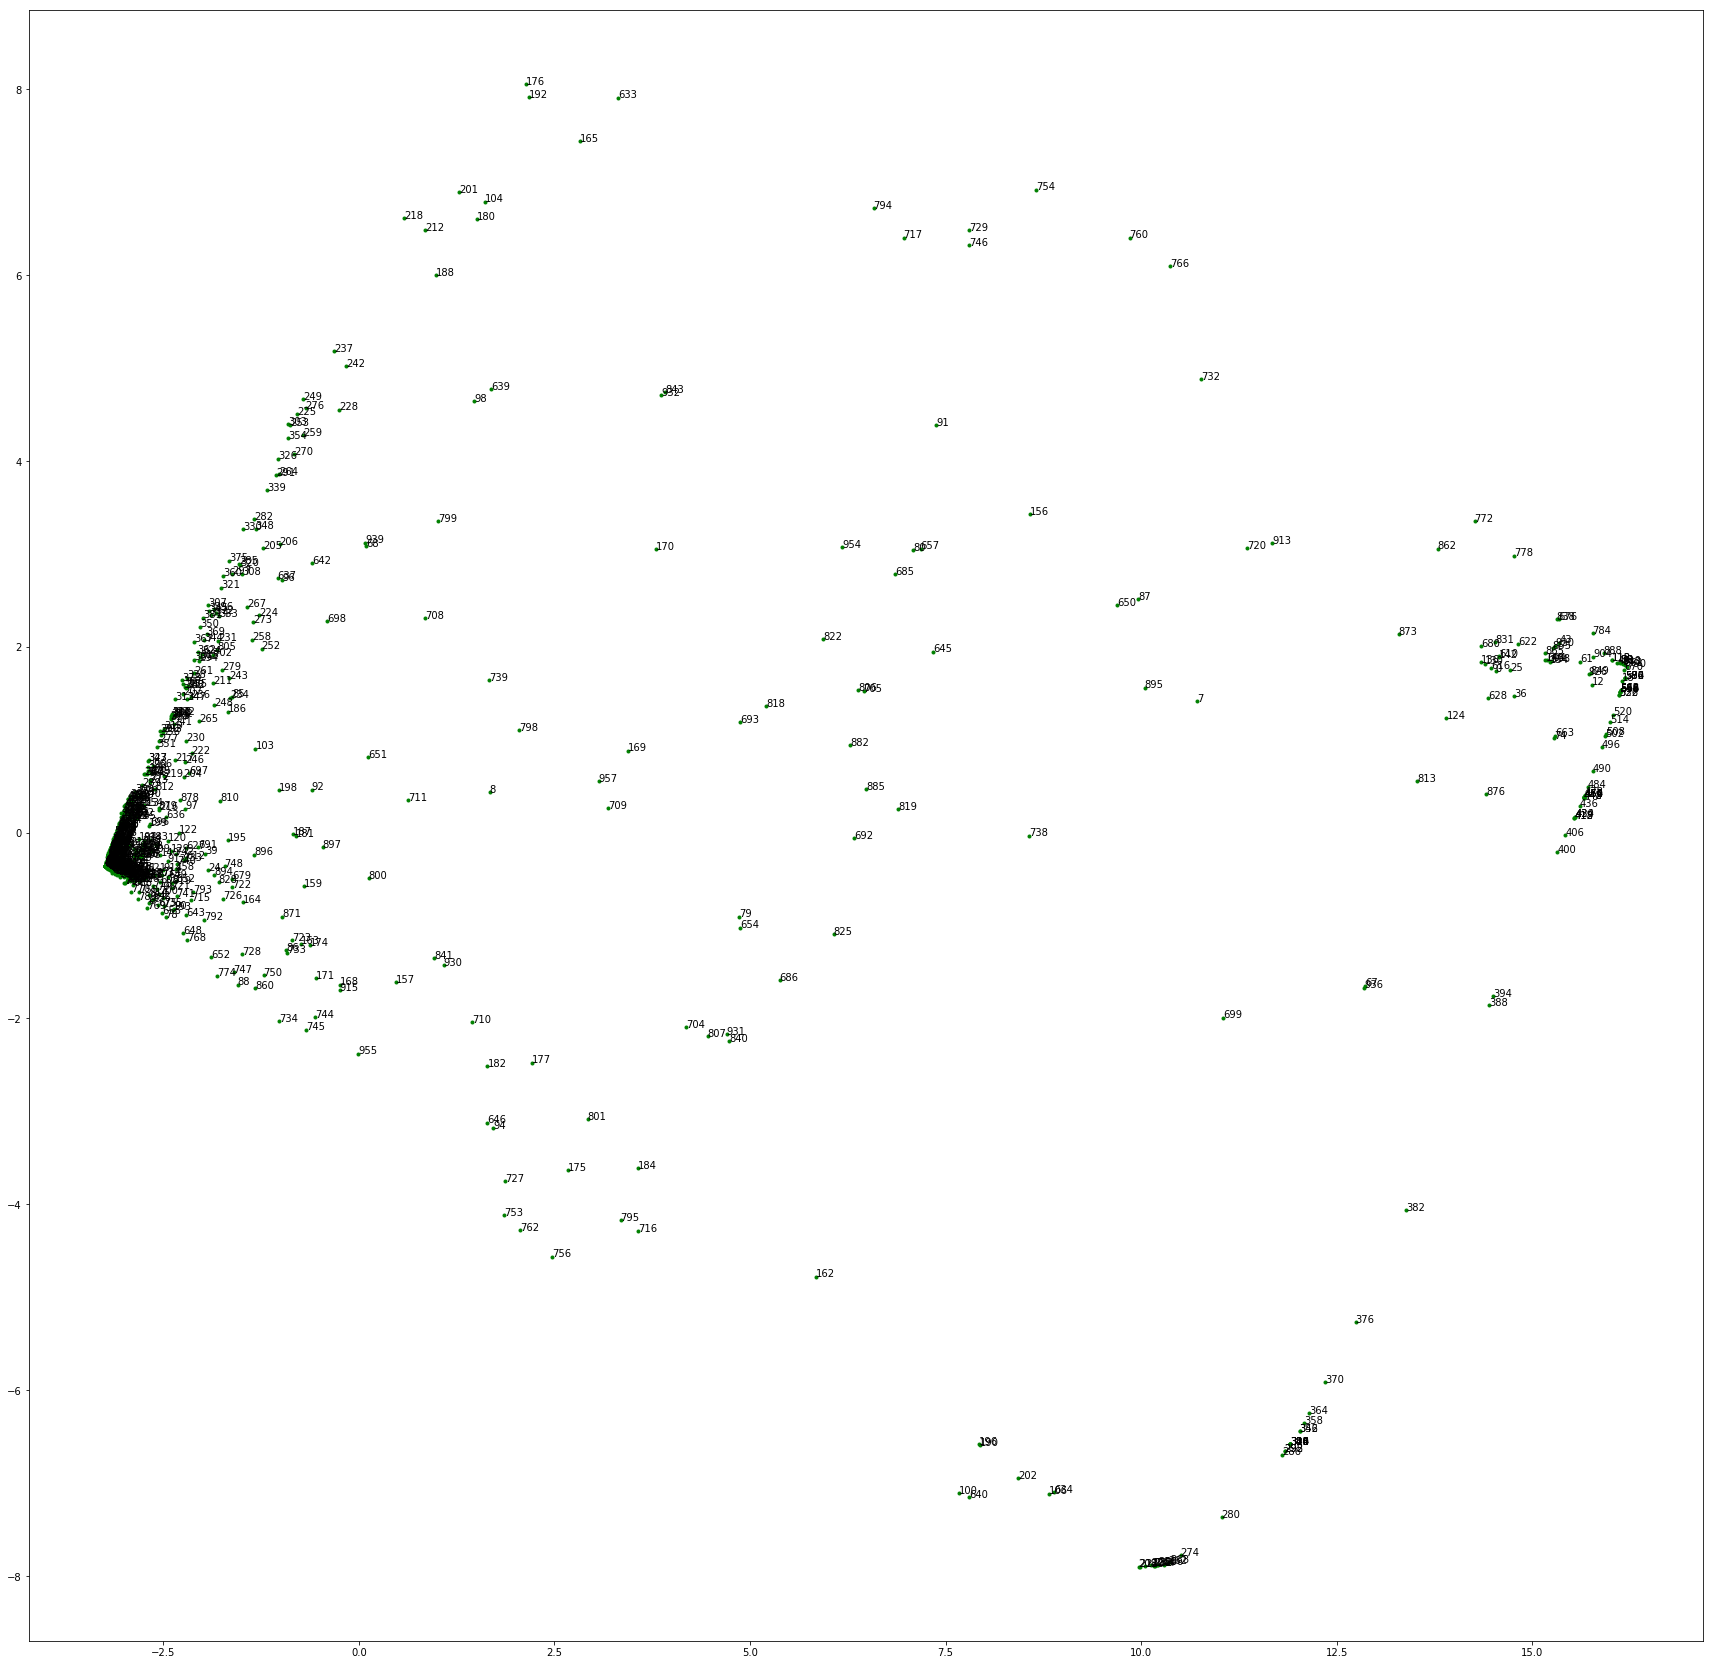

In [60]:
plt.figure(figsize = (30, 30))
ax = plt.subplot()
plt.plot(vecs_pos[:,0], vecs_pos[:,1], "g.")

for i in range(len(vecs_pos[:,0])):
    ax.annotate(str(i), (vecs_pos[i,0], vecs_pos[i,1]))